### (0 баллов) Считываем данные

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [128]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

C:\Users\fedya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [129]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [130]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [131]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [132]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [149]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
x_train.shape

(455, 13)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression = LinearRegression().fit(x_train, y_train)

In [151]:
y_prediction = regression.predict(x_test)
mean_squared_error(y_test, y_prediction)

10.806201381078065

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [152]:
def MSE(y_real, y_pred):
    return np.sum((y_real - y_pred) ** 2) / y_real.size

In [153]:
print(f'My MSE {MSE(y_test, y_prediction)}')
print(f'Not my MSE {mean_squared_error(y_test, y_prediction)}')

My MSE 10.806201381078065
Not my MSE 10.806201381078065


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [154]:
mean_y = np.mean(y_train)
y_naive = np.repeat(mean_y, y_test.size)
y_naive

array([22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956, 22.96043956, 22.96043956, 22.96043956, 22.96043956,
       22.96043956])

In [155]:
print(f'MSE for Linear {MSE(y_test, y_prediction)}')
print(f'MSE for naive {MSE(y_test, y_naive)}')

MSE for Linear 10.806201381078065
MSE for naive 36.92078071465273


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

Лучшая лямбда для ridge = 0.1 с ошибкой 10.845350120504007


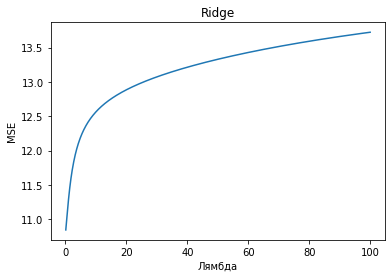

In [159]:
from sklearn.linear_model import Ridge, Lasso

lambdas = np.arange(start=0.1, stop=100, step=0.1)

ridge_errors = []

min_error_ridge = np.inf
optimal_lambda_ridge = -1

for val in lambdas:
    ridge = Ridge(alpha=val).fit(x_train, y_train)
    y_prediction_ridge = ridge.predict(x_test)
    mistake_ridge = MSE(y_test, y_prediction_ridge)
    ridge_errors.append(mistake_ridge)
    if mistake_ridge < min_error_ridge:
        min_error_ridge = mistake_ridge
        optimal_lambda_ridge = val



print(f'Лучшая лямбда для ridge = {optimal_lambda_ridge} с ошибкой {min_error_ridge}')
plt.plot(lambdas, ridge_errors)
plt.xlabel('Лямбда')
plt.ylabel('MSE')
plt.title('Ridge')
plt.show()

Лучшая лямбда для lasso = 11.4 с ошибкой 12.216714144689691


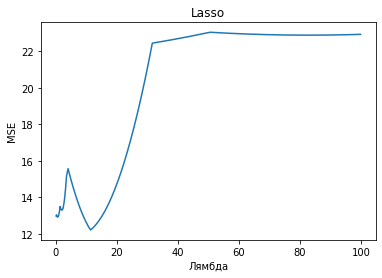

In [160]:
lasso_errors = []
min_error_lasso = np.inf
optimal_lambda_lasso = -1

for val in lambdas:
    lasso = Lasso(alpha=val).fit(x_train, y_train)
    y_prediction_lasso = lasso.predict(x_test)
    mistake_lasso = MSE(y_test, y_prediction_lasso)
    lasso_errors.append(mistake_lasso)
    if mistake_lasso < min_error_lasso:
        min_error_lasso = mistake_lasso
        optimal_lambda_lasso = val


print(f'Лучшая лямбда для lasso = {optimal_lambda_lasso} с ошибкой {min_error_lasso}')
plt.plot(lambdas, lasso_errors)
plt.xlabel('Лямбда')
plt.ylabel('MSE')
plt.title('Lasso')
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Как можно видеть L2 регуляризация только ухудшила показатель ошибки, а L1 наоборот улучшила при $\alpha=11.4$. Это может быть связано с тем, что сами признаки могут быть между собой линейно независимы, но какие-то из них являются лишними. Давайте узнаем какие.

In [161]:
lasso = Lasso(alpha=11.4).fit(x_train, y_train)
for name, coef in zip(dataset['feature_names'], lasso.coef_):
    print(f'Коэффициент для {name} = {coef}')

Коэффициент для CRIM = -0.0
Коэффициент для ZN = 0.024057129194628248
Коэффициент для INDUS = -0.0
Коэффициент для CHAS = 0.0
Коэффициент для NOX = 0.0
Коэффициент для RM = 0.0
Коэффициент для AGE = 0.0
Коэффициент для DIS = -0.0
Коэффициент для RAD = 0.0
Коэффициент для TAX = -0.010285717999100935
Коэффициент для PTRATIO = -0.0
Коэффициент для B = 0.00741483051073628
Коэффициент для LSTAT = -0.5520250643896685


Довольно интересно, что регуляризация решила убрать из признаков уровень преступности и расстояние до центров занятости.